<center><h1><strong>taudata Analytics</strong></h1></center>
<center><h2><strong><font color="blue">TSA-00: Pendahuluan Time-Series Forecasting</font></strong></h2></center>
<img alt="" src="images/covers/taudata-cover.jpg"/>

<b><center>(C) Taufik Sutanto</center>
<center><h3><font color="blue">https://taudata.blogspot.com/2022/06/tsa-00.html</font></h3></center>

In [1]:
import warnings; warnings.simplefilter('ignore')

try:
    import google.colab; IN_COLAB = True
    !pip install darts
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded


# Outline

In [2]:
import darts

# BrownLee-00:



* TSA VS TSF: ... diantaranya TSA understand past, causality, pengaruh seasonal patterns, trends, relation to external factors,

* Konsep time series sbg supervised learning penting, baik di univariate maupun multivariate



# BrownLee-02:

* Concept Drift dan Non-Time Series Time Learning
* Definisi Time Series: variabel terururt, (kadang) ada informasi waktu, waktu bisa juga menjadi variabel tambahan
* TSA VS TSF

## Component Time Series

* Concerns/Focus
* Examples

# BrownLee-03: 

* Framing TSF sebagai Supervised Learning baik univariate maupun multivariate

*  Lags and SHifts ==> Sliding Window

*  One-Multi Step TSF

* 


# BrownLee-04: EDA TS

* Squeeze and parse_dates di dataframe
* * time index membuat mudah slicing berdasarkan waktu, misal tanggal



# BrownLee-05

* Secara umum ada 3 class feature engineering di Time Series. Tapi ini ini FE dari var yg ada, tentu saja juga bisa ditambahkan dgn external variable.
 - Date-Time Features
 - Lag Features
 - Window Features

## Time Features:
 - Minutes elapsed for the day.
 - Hour of day.
 - Business hours or not.
 
## Lag Features

> Side note:  in a way model machine learning (non-conventional) good at doing this rather automatically.Bahkan feature engineering-nya jadi bisa dibilang automatis

 - beberapa timestep data sebelumnya
 - Weekend or not.
 - Season of the year.
 - Business quarter of the year.
 - Daylight savings or not.
 - Public holiday or not.
 - Leap year or not.
 
## Rolling Windows
* min,Mean/sum/max dari beberapa data sebelumnya
* **Expanding Window** ==> Accumulative values ... Bayangkan kayak akumulasi kasus covid

# BrownLee-06

Tambahan visualisasi TIme Series dari yg sudah ada di module EDA: Kelebihan yang di buku ini adalah kasih tau visualisasi apa untuk apa. Bagus juga kalau di video dibuat seperti ini + kasus.

* How  to  explore  the  temporal  structure  of  time  series  with  line  plots,  lag  plots,  andautocorrelation plots.
* How to understand the distribution of observations using histograms and density plots.
* How to tease out the change in distribution over intervals using box and whisker plotsand heat map plots

* Lag Scatter Plots: ini bisa digunakan untuk menentukan seberapa mudah/sulit untuk memodelkan time seriesnya. Korelasi positif/negatif bisa dgn mudah terlihat. Lag Scatter plot ini juga bisa dibuat dengan beberapa lag berbeda seperti di Buku.

* ACF bisa digunakan untuk menunjukkan apakah time-windows based model biasa seperti LSTM lebih cocok digunakan atau model seperti Transformer lebih cocok. Misal jika nilai ACF tinggi di ebebrapa tempat secara tidak beraturan.

### Side Notes:
- Gunakan: **from matplotlib import pyplot**

# BrownLee-07:
Handling coarse/fine-grained time series data. Bisa dibuat lebih fine-grained via berbagai teknik interpolasi atau dibuat lebih coarsed dengan cara seperti yg sdh dijelaskan di rolling windows.

## Resampling: Up dan Down Sampling
* Up Sampling adalah membuat datanya lebih fine-grained
* Down Sampling untuk membuat datanya lebih coarsed.

## Tujuan:
*  Problem Framing: Resampling may be required if your data is not available at the
same frequency that you want to make predictions.
*  Feature Engineering: Resampling can also be used to provide additional structure or
insight into the learning problem for supervised learning models



In [3]:
from pandas import read_csv
from pandas import datetime

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('data/shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
upsampled = series.resample('D').mean()
print(series.head(32))

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
1901-06-01    168.5
1901-07-01    231.8
1901-08-01    224.5
1901-09-01    192.8
1901-10-01    122.9
1901-11-01    336.5
1901-12-01    185.9
1902-01-01    194.3
1902-02-01    149.5
1902-03-01    210.1
1902-04-01    273.3
1902-05-01    191.4
1902-06-01    287.0
1902-07-01    226.0
1902-08-01    303.6
1902-09-01    289.9
1902-10-01    421.6
1902-11-01    264.5
1902-12-01    342.3
1903-01-01    339.7
1903-02-01    440.4
1903-03-01    315.9
1903-04-01    439.3
1903-05-01    401.3
1903-06-01    437.4
1903-07-01    575.5
1903-08-01    407.6
Name: Sales of shampoo over a three year period, dtype: float64


D:\Anaconda\envs\PostDoc\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [4]:
upsampled.head()

Month
1901-01-01    266.0
1901-01-02      NaN
1901-01-03      NaN
1901-01-04      NaN
1901-01-05      NaN
Freq: D, Name: Sales of shampoo over a three year period, dtype: float64

# BrownLee-08

* Beberapa transform dapat menghilangkan faktor trend, jadi kita hanya fokus ke pol a ttg 



* Metode untuk detect/ukur trend:
 - Visualisasi ==> trivial
 - Kendalls tau/regresi
* Cara untuk detect sesonality:
 - Pertama remove dulu trend-nya
 - Plot ACF bisa digunakan dan cukup baik utk hal ini
 - Method of simple averages
* Metric untuk detect seasonality:
 - Ratio to trend method
 - Ratio-to-moving-average method
 - Link relatives method

# More Good Tools and Reference

## Gunakan TSFresh + Nolds untuk mendapatkan karakteristik lengkap data Time Series

* https://tsfresh.readthedocs.io/en/latest/
* Dynamical System Metrics: https://github.com/CSchoel/nolds

## Another Good Book for univariate:
* https://otexts.com/fpp2/index.html


## Berbagai macam metode dekomposisi
* https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
* https://towardsdatascience.com/different-types-of-time-series-decomposition-396c09f92693

## 

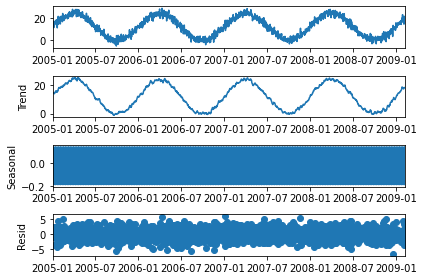

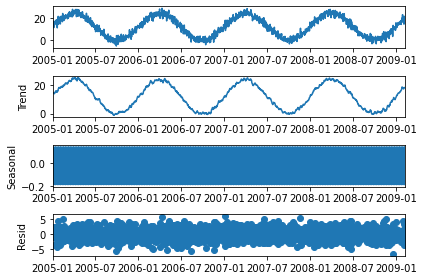

In [10]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate some data
np.random.seed(0)
n = 1500
dates = np.array('2005-01-01', dtype=np.datetime64) + np.arange(n)
data = 12*np.sin(2*np.pi*np.arange(n)/365) + np.random.normal(12, 2, 1500)
df = pd.DataFrame({'data': data}, index=dates)
seasonal_decompose(df, model='additive').plot()

In [6]:
import inspect

inspect.getargspec(seasonal_decompose)

D:\Anaconda\envs\PostDoc\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  This is separate from the ipykernel package so we can avoid doing imports until


ArgSpec(args=['x', 'model', 'filt', 'period', 'two_sided', 'extrapolate_trend'], varargs=None, keywords=None, defaults=('additive', None, None, True, 0))